<a href="https://colab.research.google.com/github/mdkamrulhasan/machine_learning_concepts/blob/master/notebooks/supervised/Regression_medical_insurance_LR_kNN_DTree_feature_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What will we cover today ?

We are going to learn how to train and test a Regression model on a real dataset. More specifically we are going to use the sklearn implementation of the following three regression models for a regression task (***diabetest severity prediction***).

1.   **Linear Regression**
2.   **kNN Regression**
3.   **Decision Tree Regressor**








[Medical insurance cost dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance/)

**Summary of the dataset:**

*   **Features:** age, sex, bmi, children, smoker, region
*   **Target (y=charges)**: medical insurance charges.







---


---





## Loading necessary python packages

In [1]:
# data processing packages
import pandas as pd

# Regression modeling package(s) (sklearn)
from sklearn.linear_model import LinearRegression

# model evaluation related packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# visualization
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

## Loading data and some preprocessing

In [2]:
# Load the  dataset
data_url = 'https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/medical-cost/insurance.csv'
df = pd.read_csv(data_url)
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Separating features and labels dataframes
features_df, labels_df = df[df.columns[:-1]], df['charges']

In [5]:
# Looking at a sample of features
features_df.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [6]:
features_df.shape

(1338, 6)

In [7]:
labels_df.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [8]:
# plotting the (bmi, target) pair values
fig = px.scatter(x=features_df['bmi'], y=labels_df.values)
fig.show()

Text(0.5, 1.0, 'BMI vs. Insurance Charges')

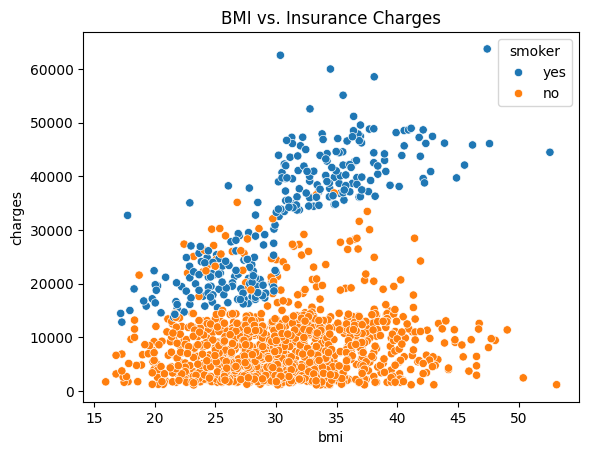

In [10]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs. Insurance Charges')

Text(0.5, 1.0, 'BMI vs. Insurance Charges')

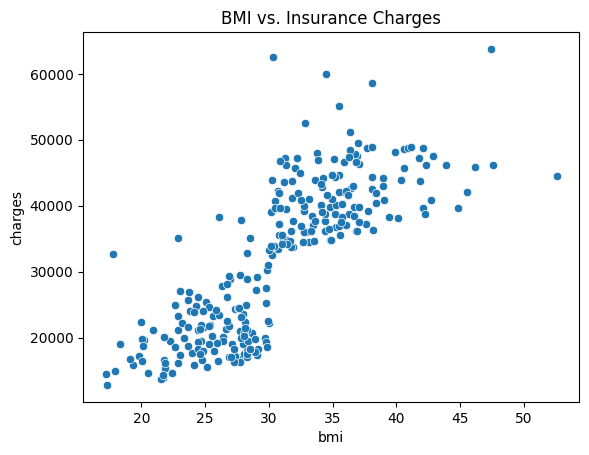

In [11]:
sns.scatterplot(x='bmi', y='charges', data=df[df.smoker=='yes'])
plt.title('BMI vs. Insurance Charges')

We clearly see a linear relationship between the bmi feature and the disease progresson rate

In [ ]:
features_df.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


### Q. Can we input these features to models (say Linear Regressor/kNN) as they are?

## Feature Preprocessing

In [12]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


## Two types of features: numeric vs categorical; Lets build a pipeline to automate this feature separation process.

In [13]:
features_numeric = []
features_categorical = []
for colx in features_df.columns:
  if features_df[colx].dtype == 'object':
    #print(colx, df[colx].nunique())
    features_categorical.append(colx)
  else:
    features_numeric.append(colx)
print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['age', 'bmi', 'children']
categorical features: ['sex', 'smoker', 'region']


## Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder


encoded_df = features_df.copy()

label_encoder = LabelEncoder()
for featx in features_categorical:
  encoded_df[featx] = label_encoder.fit_transform(encoded_df[featx])

In [15]:
encoded_df.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


## One Hot Encoding

This is little tricker than the Label Encoder.

In [18]:
# lets check with the first categorical feature
f_categorical = features_categorical[0]
one_hot_transform = pd.get_dummies(
    features_df[f_categorical], prefix=f_categorical+'_')
one_hot_transform.head(3)

,sex__female,sex__male
0,True,False
1,False,True
2,False,True


In [19]:
# lets do for all categorical features
one_hot_dataframes = []
for featx in features_categorical:
  one_hot_dataframes.append(
      pd.get_dummies(features_df[featx], prefix=featx+'_')
  )

In [20]:
# now merge all process dataframes
encoded_df = pd.concat([features_df[features_numeric]]
                           + one_hot_dataframes, axis=1)
encoded_df.head()

,age,bmi,children,sex__female,sex__male,smoker__no,smoker__yes,region__northeast,region__northwest,region__southeast,region__southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


## Now we can feed these data to our models; wait; do you see any issue related to the scale of these data/features?

In [21]:
encoded_df.min(), encoded_df.max()

(age                     18
 bmi                  15.96
 children                 0
 sex__female          False
 sex__male            False
 smoker__no           False
 smoker__yes          False
 region__northeast    False
 region__northwest    False
 region__southeast    False
 region__southwest    False
 dtype: object,
 age                     64
 bmi                  53.13
 children                 5
 sex__female           True
 sex__male             True
 smoker__no            True
 smoker__yes           True
 region__northeast     True
 region__northwest     True
 region__southeast     True
 region__southwest     True
 dtype: object)

## Lets scale our data

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# min-max scaling
feature_scaler = MinMaxScaler()
# standard scaling
# feature_scaler = StandardScaler()
encoded_df_scaled = feature_scaler.fit_transform(encoded_df.to_numpy())
df_preprocessed = pd.DataFrame(encoded_df_scaled, columns=encoded_df.columns)

In [31]:
df_preprocessed.min(), df_preprocessed.max()

(age                  0.0
 bmi                  0.0
 children             0.0
 sex__female          0.0
 sex__male            0.0
 smoker__no           0.0
 smoker__yes          0.0
 region__northeast    0.0
 region__northwest    0.0
 region__southeast    0.0
 region__southwest    0.0
 dtype: float64,
 age                  1.0
 bmi                  1.0
 children             1.0
 sex__female          1.0
 sex__male            1.0
 smoker__no           1.0
 smoker__yes          1.0
 region__northeast    1.0
 region__northwest    1.0
 region__southeast    1.0
 region__southwest    1.0
 dtype: float64)

In [32]:
df_preprocessed.head()

,age,bmi,children,sex__female,sex__male,smoker__no,smoker__yes,region__northeast,region__northwest,region__southeast,region__southwest
0,0.021739,0.321227,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [33]:
df_preprocessed.age.min(), df_preprocessed.age.max()

(0.0, 1.0)



---



---



## Good news: Our data is now ready to feed our models



---



---



# Modeling

Extracting features and labels as numpy matrices

In [34]:
X, y = df_preprocessed.values, labels_df.values

Splitting data into train, test splits

In [35]:
# test data amount (in terms of proportion)
TEST_PROP = 0.5
# Random number seed; important for experiment reproducibility
RANDOM_SEED = 0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_PROP, random_state=RANDOM_SEED)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((669, 11), (669,), (669, 11), (669,))

Model Instantiation

In [36]:
# Create a linear regression object
regr = LinearRegression()

Model Training

In [37]:
# Train the model using the training set
regr.fit(X_train, y_train)

LinearRegression()

In [38]:
regr.coef_, regr.intercept_

(array([ 11733.14364656,  13480.49366024,   2708.28205687,    157.76621462,
          -157.76621462, -11684.31000493,  11684.31000493,    580.70352997,
           218.65766143,   -351.65608544,   -447.70510596]),
 np.float64(8758.19790733857))

Making Predictions and evaluation (on the traning data)

- just checking how good the model fit was on the training data.

In [39]:
# Making predictions (training dataset)
y_pred = regr.predict(X_train)
# Estimating the Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred)
print("Mean squared error (training data): %.2f" % mse_train)

Mean squared error (training data): 38723598.71


Making Predictions and evaluation (on the test data)

- This is more interesting metric as we are reporting on unseen data (by the model)

In [40]:
# Making predictions (test dataset)
y_pred = regr.predict(X_test)
# Estimating the Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (test data): %.2f" % mse_test)

MSE (test data): 34453513.05


In [41]:
lreg_results = pd.DataFrame({
  'model': ['lr'],
  'train_err': [round(mse_train, 2)],
  'test_err': [round(mse_test, 2)]
})

## kNN Regressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor

N_NEAREST_NEIGHOR_PARAM = 10

# Model instantiation and training
reg_knn = KNeighborsRegressor(n_neighbors=N_NEAREST_NEIGHOR_PARAM)
reg_knn.fit(X_train, y_train)

# Prediction and error estimation (traing data)
y_pred = reg_knn.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
print("MSE (train data): %.2f" % mse_train)

# Prediction and error estimation (test data)
y_pred = reg_knn.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (test data): %.2f" % mse_test)

# Storing results in a dataframe
knn_results = pd.DataFrame({
  'model': ['knn'],
  'train_err': [round(mse_train, 2)],
  'test_err': [round(mse_test, 2)]
})

MSE (train data): 37323535.24
MSE (test data): 38304069.93


## Decison Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

# Model instantiation and training
reg_dtree = DecisionTreeRegressor()
reg_dtree.fit(X_train, y_train)

# Prediction and error estimation (traing data)
y_pred = reg_dtree.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
print("MSE (train data): %.2f" % mse_train)

# Prediction and error estimation (test data)
y_pred = reg_dtree.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (test data): %.2f" % mse_test)

# Storing results in a dataframe
dtree_results = pd.DataFrame({
  'model': ['dtree'],
  'train_err': [round(mse_train, 2)],
  'test_err': [round(mse_test, 2)]
})

MSE (train data): 0.00
MSE (test data): 47995383.95


## Comparing model performances

In [44]:
results = pd.concat([lreg_results, knn_results, dtree_results], axis=0)

fig = go.Figure([
    go.Bar(x=results.model, y=results.train_err, name='Training error'),
    go.Bar(x=results.model, y=results.test_err, name='Test error')
]
               )
fig.update_layout(
    title="Model comparison", yaxis_title="MSE")
fig.update_layout(
    legend=dict(
        x=0.05,
        y=0.95
    )
)
fig.show()

# Questions for you



*   Any differences have you noticed among these three model performances ?
*   Which is your preferred model and why?
*   What steps would you take to make a fair comparion among these models (model classes)?



